In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
urldata = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/UNB Dataset Features/Address_urldata.csv")
urldata.head()


,Have IP,Have @,URL Length,URL Depth,Redirection,https Domain,TinyURL,Prefix/Suffix,Have client,Have admin,...,.txt,.js,.exe,Num of periods,Is encoded,Num of encoded char,Num of parameters,Num of digits,Num of spec char,Label
0,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,18,8,0
1,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,23,9,0
2,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,22,9,0
3,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,18,11,0
4,0,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,18,9,0


In [ ]:
urldata.columns

Index(['Have IP', 'Have @', 'URL Length', 'URL Depth', 'Redirection',
       'https Domain', 'TinyURL', 'Prefix/Suffix', 'Have client', 'Have admin',
       'Have login', 'Have server', '.php', '.html', '.info', '.txt', '.js',
       '.exe', 'Num of periods', 'Is encoded', 'Num of encoded char',
       'Num of parameters', 'Num of digits', 'Num of spec char', 'Label'],
      dtype='object')

In [ ]:
urldata.shape

(165366, 25)

In [ ]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165366 entries, 0 to 165365
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Have IP              165366 non-null  int64
 1   Have @               165366 non-null  int64
 2   URL Length           165366 non-null  int64
 3   URL Depth            165366 non-null  int64
 4   Redirection          165366 non-null  int64
 5   https Domain         165366 non-null  int64
 6   TinyURL              165366 non-null  int64
 7   Prefix/Suffix        165366 non-null  int64
 8   Have client          165366 non-null  int64
 9   Have admin           165366 non-null  int64
 10  Have login           165366 non-null  int64
 11  Have server          165366 non-null  int64
 12  .php                 165366 non-null  int64
 13  .html                165366 non-null  int64
 14  .info                165366 non-null  int64
 15  .txt                 165366 non-null  int64
 16  .j

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

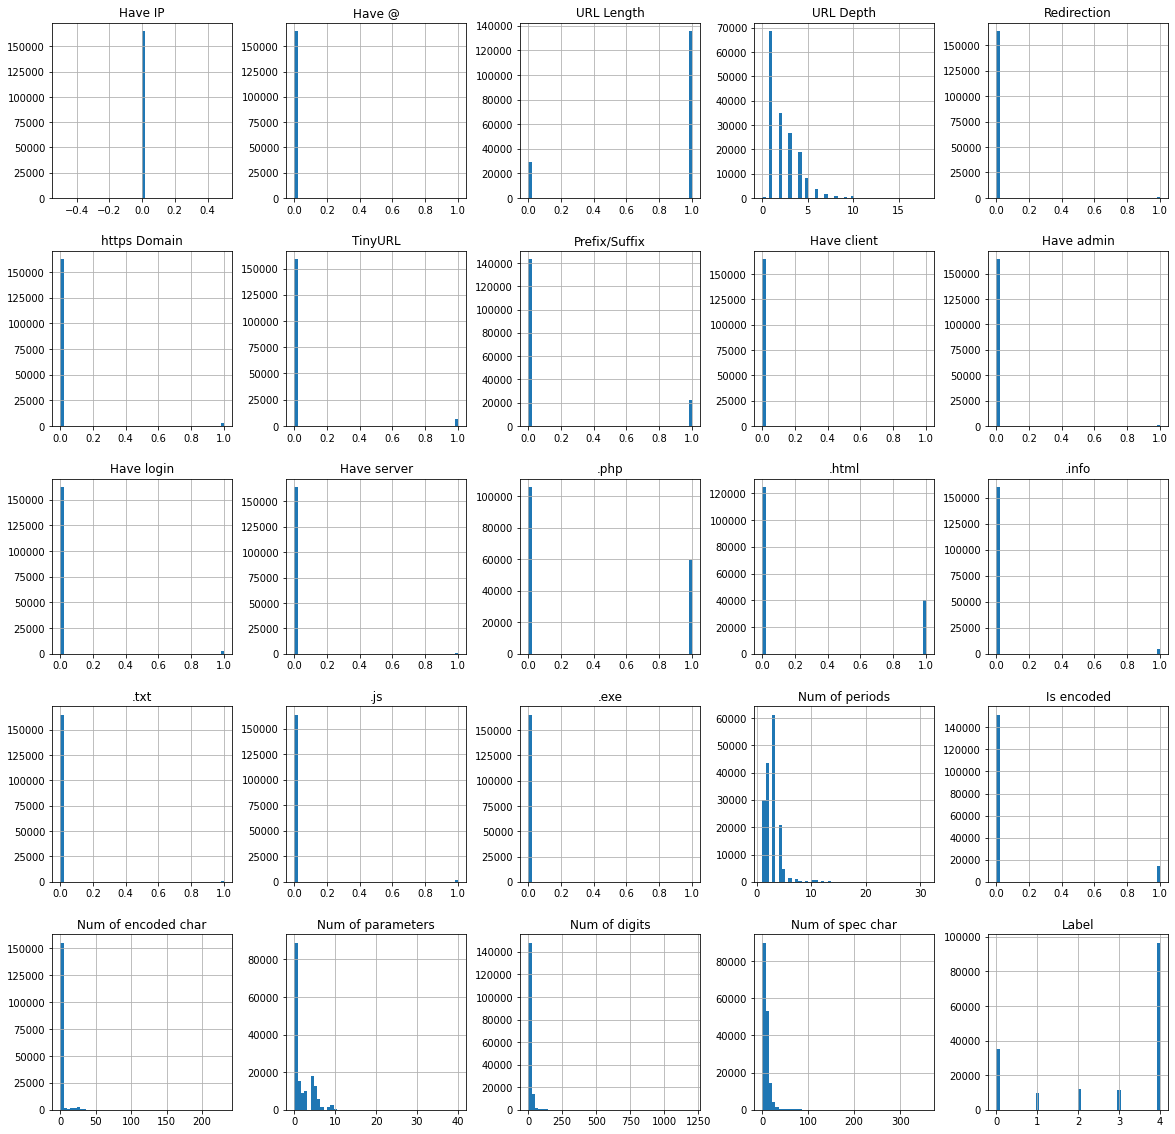

In [ ]:
#Plotting the data distribution
urldata.hist(bins = 50,figsize = (20,20))
plt.show()

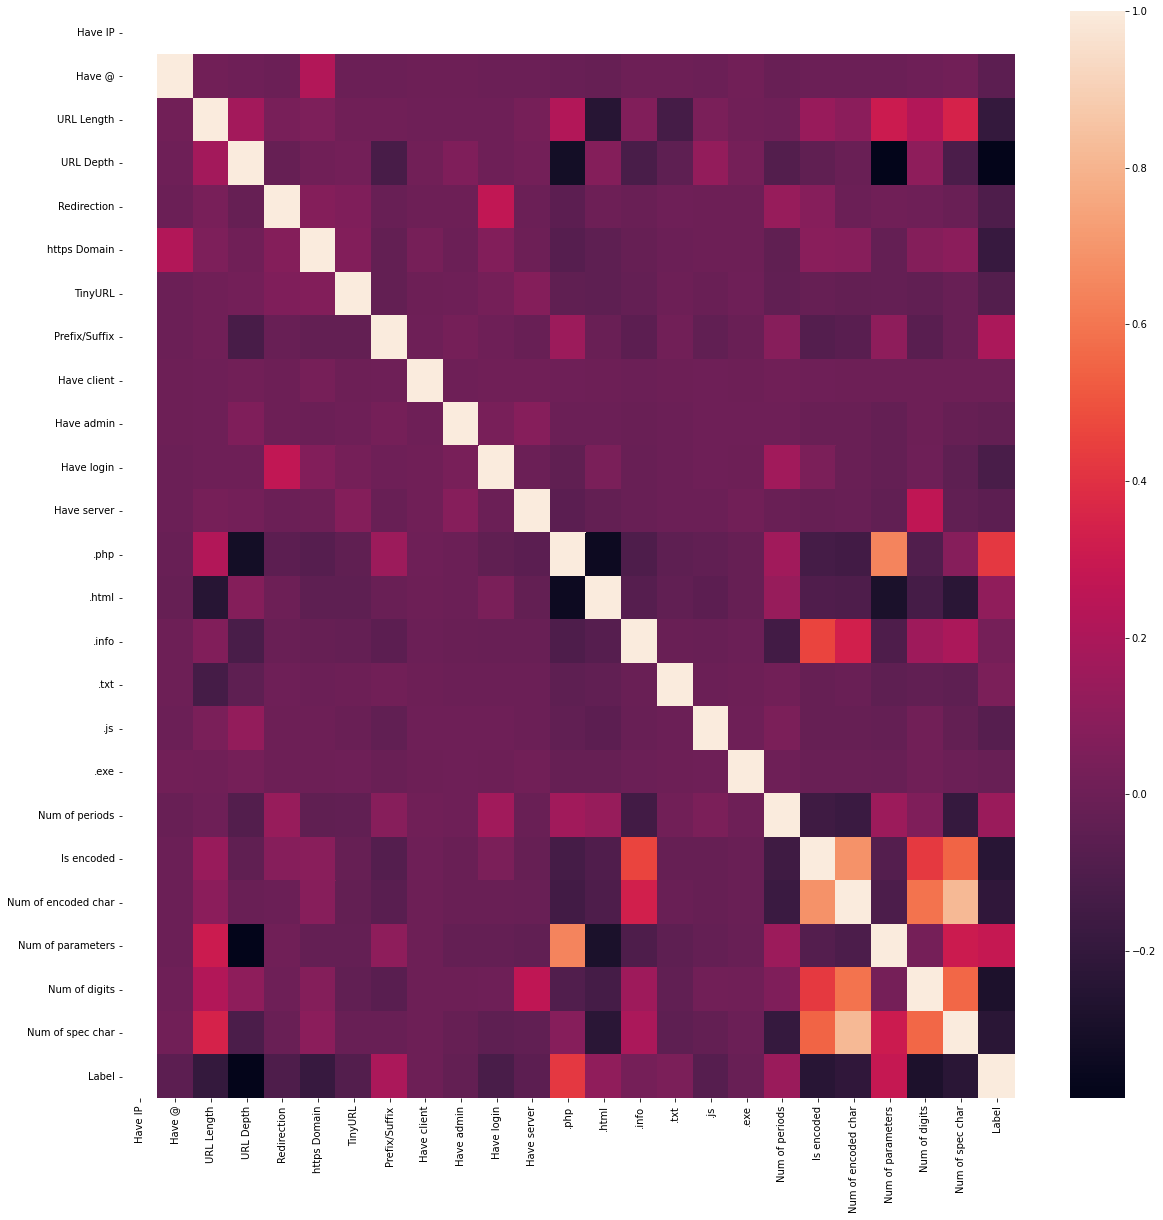

In [ ]:
#Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(urldata.corr())
plt.show()

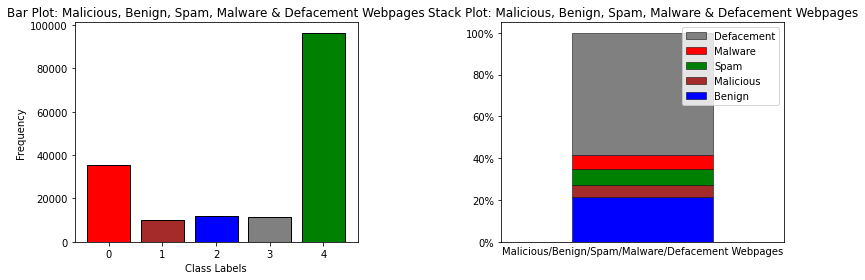

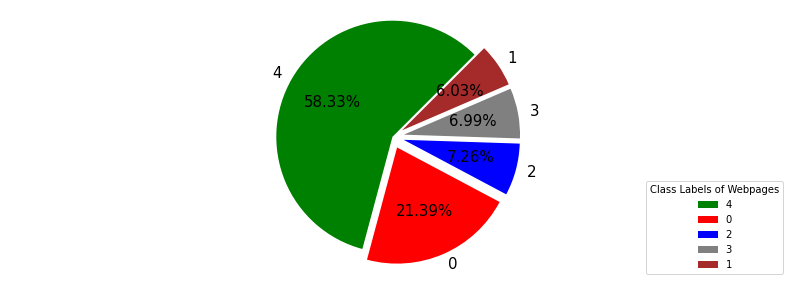

In [ ]:
# Bar Plot of Malicious and Benign Websites
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fig = plt.figure(figsize = (12,4))
#title = fig.suptitle("Plot of Malicious and Benign Webpages", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
#Bar Plot
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("Class Labels")
ax1.set_ylabel("Frequency")
ax1.title.set_text('Bar Plot: Malicious, Benign, Spam, Malware & Defacement Webpages')
labels = urldata['Label'].value_counts()
w = (list(labels.index), list(labels.values))
ax1.tick_params(axis='both', which='major')
bar = ax1.bar(w[0], w[1], color=['green','red', 'blue', 'grey', 'brown'], edgecolor='black', linewidth=1)
#Stacked Plot
ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text('Stack Plot: Malicious, Benign, Spam, Malware & Defacement Webpages')
# create dummy variable then group by that set the legend to false because we'll fix it later
urldata.assign(dummy = 1).groupby(['dummy','Label']).size().groupby(level=0).apply(
                  lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',stacked=True,
                  legend=False,ax=ax2,color={'green','red', 'blue', 'grey', 'brown'}, linewidth=0.50, ec='k')
ax2.set_xlabel('Malicious/Benign/Spam/Malware/Defacement Webpages')# or it'll show up as 'dummy'
ax2.set_xticks([])# disable ticks in the x axis
current_handles, _ = plt.gca().get_legend_handles_labels()#Fixing Legend
reversed_handles = reversed(current_handles)
correct_labels = reversed(['Benign','Malicious','Spam', 'Malware', 'Defacement'])
plt.legend(reversed_handles,correct_labels)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
#Saving the Figs
figc = plt.gcf()
plt.tight_layout()
figc.savefig("/content/drive/MyDrive/Phishing/UNB/Multi/Images/ImagesBar Plot & Stack Plot of Malicious & Benign Webpages.svg")
figc.savefig("/content/drive/MyDrive/Phishing/UNB/Multi/Images/Bar Plot & Stack Plot of Malicious & Benign Webpages.png")
# extent = ax1.get_window_extent().transformed(figc.dpi_scale_trans.inverted())
# figc.savefig("/content/drive/MyDrive/Phishing/Images/Bar Plot of Class Labels.png",bbox_inches=extent.expanded(1.2, 1.4))
# extent = ax2.get_window_extent().transformed(figc.dpi_scale_trans.inverted())
# figc.savefig("/content/drive/MyDrive/Phishing/Images/Stack Plot of Class Labels.png",bbox_inches=extent.expanded(1.5, 1.4)


# Pie Chart of Malicious and Benign Webpages Distribution
fig = plt.figure(figsize = (14,5))
Explode = [0,0.1,0.1,0.1,0.1]
plt.pie(w[1],explode=Explode,labels=w[0],shadow=False,startangle=45,
colors=['green','red', 'blue', 'grey', 'brown'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Class Labels of Webpages',loc='lower right')
fig.savefig('/content/drive/MyDrive/Phishing/UNB/Multi/Images/Pie Chart Distribution of Class Labels.svg')
fig.savefig('/content/drive/MyDrive/Phishing/UNB/Multi/Images/Pie Chart Distribution of Class Labels.png')
plt.show()

In [ ]:
urldata.describe()

,Have IP,Have @,URL Length,URL Depth,Redirection,https Domain,TinyURL,Prefix/Suffix,Have client,Have admin,...,.txt,.js,.exe,Num of periods,Is encoded,Num of encoded char,Num of parameters,Num of digits,Num of spec char,Label
count,165366.0,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000,...,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000,165366.000000
mean,0.0,0.001542,0.820876,2.351463,0.008369,0.014531,0.037341,0.132155,0.002074,0.005086,...,0.004330,0.011925,0.001923,2.734565,0.084727,1.808564,1.712746,9.141752,7.993596,2.748394
std,0.0,0.039239,0.383457,1.656100,0.091101,0.119668,0.189598,0.338661,0.045496,0.071133,...,0.065659,0.108549,0.043810,1.546046,0.278476,8.628205,2.358577,15.712669,9.931145,1.661039
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,6.000000,4.000000
75%,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,4.000000,10.000000,11.000000,4.000000
max,0.0,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,31.000000,1.000000,231.000000,40.000000,1204.000000,356.000000,4.000000


In [ ]:
#checking the data for null or missing values
urldata.isnull().sum()

Have IP                0
Have @                 0
URL Length             0
URL Depth              0
Redirection            0
https Domain           0
TinyURL                0
Prefix/Suffix          0
Have client            0
Have admin             0
Have login             0
Have server            0
.php                   0
.html                  0
.info                  0
.txt                   0
.js                    0
.exe                   0
Num of periods         0
Is encoded             0
Num of encoded char    0
Num of parameters      0
Num of digits          0
Num of spec char       0
Label                  0
dtype: int64

In [4]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urldata = urldata.sample(frac=1).reset_index(drop=True)
urldata.head()

,Have IP,Have @,URL Length,URL Depth,Redirection,https Domain,TinyURL,Prefix/Suffix,Have client,Have admin,...,.txt,.js,.exe,Num of periods,Is encoded,Num of encoded char,Num of parameters,Num of digits,Num of spec char,Label
0,0,0,1,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,6,8,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,4,0,0,9,9,22,4
2,0,0,1,3,0,0,0,0,0,0,...,0,0,0,3,0,0,1,0,1,4
3,0,0,1,3,0,0,0,1,0,0,...,0,0,0,2,0,0,0,3,2,4
4,0,0,1,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,8,10,0


In [5]:
import numpy as np

# Sepratating & assigning features and target columns to X & y
y = urldata['Label'].values
x = np.array(urldata.drop('Label',axis=1))


print(x.shape, y.shape)


(165366, 24) (165366,)


In [6]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, random_state = 12)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(115756, 24) (49610, 24)
(115756,) (49610,)


In [7]:
output = {}
output['labels'] = y_test

**DecisionTree Classifier**

In [9]:
import keras

from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle

def model_dtc(x_train, x_val, y_train, y_val, opt, n):
  dtcclassifier = DecisionTreeClassifier()
  #compile model using mse as a measure of model performance
  dtcclassifier.fit(x_train, y_train)

  y_pred = dtcclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/DTC/model_'+str(n)+'.h5'
  pickle.dump(dtcclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_dtc(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


Validation Accuracy: 0.9501554941257775
model 0 saved
Validation Accuracy: 0.9465272978576365
model 1 saved
Validation Accuracy: 0.9441948859709745
model 2 saved
Validation Accuracy: 0.9485141672425709
model 3 saved
Validation Accuracy: 0.9492916378714582
model 4 saved
Validation Accuracy: 0.94713199723566
model 5 saved
Validation Accuracy: 0.9485961123110151
model 6 saved
Validation Accuracy: 0.9518790496760259
model 7 saved
Validation Accuracy: 0.9501511879049676
model 8 saved
Validation Accuracy: 0.948768898488121
model 9 saved
Average Validation Accuracy: 0.9485210728684207


In [10]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/DTC/model_7.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['dt_prediction_non'] = [i[0] for i in y_pred_prob];
output['dt_prediction_phish'] = [i[1] for i in y_pred_prob];
output['dt_prediction_spam'] = [i[2] for i in y_pred_prob];
output['dt_prediction_malware'] = [i[3] for i in y_pred_prob];
output['dt_prediction_defacemen'] = [i[4] for i in y_pred_prob];

output = pd.DataFrame.from_dict(output)
output


[[0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.01123596 0.         0.98876404]
 ...
 [0.         0.         0.         0.         1.        ]
 [1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]]


,labels,dt_prediction_non,dt_prediction_phish,dt_prediction_spam,dt_prediction_malware,dt_prediction_defacemen
0,4,0.0,0.0,0.000000,0.0,1.000000
1,4,0.0,0.0,0.000000,0.0,1.000000
2,4,0.0,0.0,0.011236,0.0,0.988764
3,4,0.0,0.0,0.000000,0.0,1.000000
4,4,0.0,0.0,0.000000,0.0,1.000000
...,...,...,...,...,...,...
49605,3,0.0,0.0,0.000000,1.0,0.000000
49606,4,0.0,0.0,0.000000,0.0,1.000000
49607,4,0.0,0.0,0.000000,0.0,1.000000
49608,0,1.0,0.0,0.000000,0.0,0.000000


**SVC**

In [ ]:
import keras

import pickle
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


def model_svc(x_train, x_val, y_train, y_val, opt, n):
  svclassifier = SVC(kernel='rbf', probability= True)
  #compile model using mse as a measure of model performance
  svclassifier.fit(x_train, y_train)

  y_pred = svclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/SVC/model_'+str(n)+'.h5'
  pickle.dump(svclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
# early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_svc(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


Validation Accuracy: 0.8548721492743607
model 0 saved
Validation Accuracy: 0.8526261230131306
model 1 saved
Validation Accuracy: 0.8478749136143746
model 2 saved
Validation Accuracy: 0.8515031098825155
model 3 saved
Validation Accuracy: 0.846147201105736
model 4 saved


In [11]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/SVC/model_0.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['svc_prediction_non'] = [i[0] for i in y_pred_prob];
output['svc_prediction_phish'] = [i[1] for i in y_pred_prob];
output['svc_prediction_spam'] = [i[2] for i in y_pred_prob];
output['svc_prediction_malware'] = [i[3] for i in y_pred_prob];
output['svc_prediction_defacemen'] = [i[4] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[4.48587366e-04 6.69652238e-02 4.48982758e-03 1.65379330e-03
  9.26442568e-01]
 [1.28874676e-03 3.11596569e-02 2.68791289e-03 2.97276404e-02
  9.35136043e-01]
 [7.24034997e-04 4.96781633e-03 2.49522910e-02 2.75739807e-02
  9.41781877e-01]
 ...
 [5.29046601e-04 9.65349056e-04 2.72464243e-03 7.90966206e-04
  9.94989996e-01]
 [8.42053465e-01 4.62851935e-02 4.32313227e-02 4.74590742e-02
  2.09709446e-02]
 [3.08799878e-03 5.03366802e-03 1.09682191e-02 5.53253078e-03
  9.75377583e-01]]


,labels,dt_prediction_non,dt_prediction_phish,dt_prediction_spam,dt_prediction_malware,dt_prediction_defacemen,svc_prediction_non,svc_prediction_phish,svc_prediction_spam,svc_prediction_malware,svc_prediction_defacemen
0,4,0.0,0.0,0.000000,0.0,1.000000,0.000449,0.066965,0.004490,0.001654,0.926443
1,4,0.0,0.0,0.000000,0.0,1.000000,0.001289,0.031160,0.002688,0.029728,0.935136
2,4,0.0,0.0,0.011236,0.0,0.988764,0.000724,0.004968,0.024952,0.027574,0.941782
3,4,0.0,0.0,0.000000,0.0,1.000000,0.005968,0.057180,0.008171,0.055306,0.873375
4,4,0.0,0.0,0.000000,0.0,1.000000,0.066109,0.000899,0.018838,0.036158,0.877996
...,...,...,...,...,...,...,...,...,...,...,...
49605,3,0.0,0.0,0.000000,1.0,0.000000,0.033349,0.282426,0.221706,0.457528,0.004990
49606,4,0.0,0.0,0.000000,0.0,1.000000,0.001307,0.007719,0.002576,0.015538,0.972860
49607,4,0.0,0.0,0.000000,0.0,1.000000,0.000529,0.000965,0.002725,0.000791,0.994990
49608,0,1.0,0.0,0.000000,0.0,0.000000,0.842053,0.046285,0.043231,0.047459,0.020971


**KNN**

In [ ]:
import keras

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pickle

def model_knn(x_train, x_val, y_train, y_val, opt, n):
  knnclassifier = KNeighborsClassifier(n_neighbors=5)
  #compile model using mse as a measure of model performance
  knnclassifier.fit(x_train, y_train)

  y_pred = knnclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/KNN/model_'+str(n)+'.h5'
  pickle.dump(knnclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_knn(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


Validation Accuracy: 0.9352107809260539
model 0 saved
Validation Accuracy: 0.9334830684174154
model 1 saved
Validation Accuracy: 0.9311506565307532
model 2 saved
Validation Accuracy: 0.9328783690393918
model 3 saved
Validation Accuracy: 0.9364201796821009
model 4 saved
Validation Accuracy: 0.9323600552868003
model 5 saved
Validation Accuracy: 0.9355507559395249
model 6 saved
Validation Accuracy: 0.9369330453563715
model 7 saved
Validation Accuracy: 0.9387473002159827
model 8 saved
Validation Accuracy: 0.9354643628509719
model 9 saved
Average Validation Accuracy: 0.9348198574245365


In [12]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/KNN/model_8.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['knn_prediction_non'] = [i[0] for i in y_pred_prob];
output['knn_prediction_phish'] = [i[1] for i in y_pred_prob];
output['knn_prediction_spam'] = [i[2] for i in y_pred_prob];
output['knn_prediction_malware'] = [i[3] for i in y_pred_prob];
output['knn_prediction_defacemen'] = [i[4] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


,labels,dt_prediction_non,dt_prediction_phish,dt_prediction_spam,dt_prediction_malware,dt_prediction_defacemen,svc_prediction_non,svc_prediction_phish,svc_prediction_spam,svc_prediction_malware,svc_prediction_defacemen,knn_prediction_non,knn_prediction_phish,knn_prediction_spam,knn_prediction_malware,knn_prediction_defacemen
0,4,0.0,0.0,0.000000,0.0,1.000000,0.000449,0.066965,0.004490,0.001654,0.926443,0.0,0.0,0.0,0.0,1.0
1,4,0.0,0.0,0.000000,0.0,1.000000,0.001289,0.031160,0.002688,0.029728,0.935136,0.0,0.0,0.0,0.0,1.0
2,4,0.0,0.0,0.011236,0.0,0.988764,0.000724,0.004968,0.024952,0.027574,0.941782,0.0,0.0,0.0,0.0,1.0
3,4,0.0,0.0,0.000000,0.0,1.000000,0.005968,0.057180,0.008171,0.055306,0.873375,0.0,0.2,0.0,0.0,0.8
4,4,0.0,0.0,0.000000,0.0,1.000000,0.066109,0.000899,0.018838,0.036158,0.877996,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49605,3,0.0,0.0,0.000000,1.0,0.000000,0.033349,0.282426,0.221706,0.457528,0.004990,0.0,0.0,0.0,1.0,0.0
49606,4,0.0,0.0,0.000000,0.0,1.000000,0.001307,0.007719,0.002576,0.015538,0.972860,0.0,0.0,0.0,0.0,1.0
49607,4,0.0,0.0,0.000000,0.0,1.000000,0.000529,0.000965,0.002725,0.000791,0.994990,0.0,0.0,0.0,0.0,1.0
49608,0,1.0,0.0,0.000000,0.0,0.000000,0.842053,0.046285,0.043231,0.047459,0.020971,1.0,0.0,0.0,0.0,0.0


**XGB Classifier**

In [ ]:
import keras

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pickle

def model_xgb(x_train, x_val, y_train, y_val, opt, n):
  xgbclassifier = XGBClassifier(n_neighbors=5)
  #compile model using mse as a measure of model performance
  xgbclassifier.fit(x_train, y_train)

  y_pred = xgbclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/XGBoost/model_'+str(n)+'.h5'
  pickle.dump(xgbclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_xgb(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


Validation Accuracy: 0.874913614374568
model 0 saved
Validation Accuracy: 0.8763821700069109
model 1 saved
Validation Accuracy: 0.8758638562543193
model 2 saved
Validation Accuracy: 0.8838977194194886
model 3 saved
Validation Accuracy: 0.8837249481686248
model 4 saved
Validation Accuracy: 0.8808742225293711
model 5 saved
Validation Accuracy: 0.8743844492440604
model 6 saved
Validation Accuracy: 0.8753347732181426
model 7 saved
Validation Accuracy: 0.8823326133909287
model 8 saved
Validation Accuracy: 0.8768034557235421
model 9 saved
Average Validation Accuracy: 0.8784511822329957


In [13]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/XGBoost/model_3.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['XGB_prediction_non'] = [i[0] for i in y_pred_prob];
output['XGB_prediction_phish'] = [i[1] for i in y_pred_prob];
output['XGB_prediction_spam'] = [i[2] for i in y_pred_prob];
output['XGB_prediction_malware'] = [i[3] for i in y_pred_prob];
output['XGB_prediction_defacemen'] = [i[4] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[0.00175492 0.02370063 0.01380221 0.00130907 0.95943314]
 [0.01216032 0.00915675 0.00365034 0.03903814 0.93599445]
 [0.00302976 0.00145002 0.00886378 0.01564598 0.97101045]
 ...
 [0.00651906 0.00375021 0.11222079 0.00529973 0.8722102 ]
 [0.9195101  0.00317193 0.00815388 0.03721289 0.03195114]
 [0.01387096 0.00782194 0.08121654 0.01036204 0.8867285 ]]


,labels,dt_prediction_non,dt_prediction_phish,dt_prediction_spam,dt_prediction_malware,dt_prediction_defacemen,svc_prediction_non,svc_prediction_phish,svc_prediction_spam,svc_prediction_malware,...,knn_prediction_non,knn_prediction_phish,knn_prediction_spam,knn_prediction_malware,knn_prediction_defacemen,XGB_prediction_non,XGB_prediction_phish,XGB_prediction_spam,XGB_prediction_malware,XGB_prediction_defacemen
0,4,0.0,0.0,0.000000,0.0,1.000000,0.000449,0.066965,0.004490,0.001654,...,0.0,0.0,0.0,0.0,1.0,0.001755,0.023701,0.013802,0.001309,0.959433
1,4,0.0,0.0,0.000000,0.0,1.000000,0.001289,0.031160,0.002688,0.029728,...,0.0,0.0,0.0,0.0,1.0,0.012160,0.009157,0.003650,0.039038,0.935994
2,4,0.0,0.0,0.011236,0.0,0.988764,0.000724,0.004968,0.024952,0.027574,...,0.0,0.0,0.0,0.0,1.0,0.003030,0.001450,0.008864,0.015646,0.971010
3,4,0.0,0.0,0.000000,0.0,1.000000,0.005968,0.057180,0.008171,0.055306,...,0.0,0.2,0.0,0.0,0.8,0.051212,0.024863,0.007405,0.071889,0.844631
4,4,0.0,0.0,0.000000,0.0,1.000000,0.066109,0.000899,0.018838,0.036158,...,0.0,0.0,0.0,0.0,1.0,0.038109,0.001828,0.003629,0.019919,0.936514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49605,3,0.0,0.0,0.000000,1.0,0.000000,0.033349,0.282426,0.221706,0.457528,...,0.0,0.0,0.0,1.0,0.0,0.029166,0.382913,0.404776,0.144165,0.038979
49606,4,0.0,0.0,0.000000,0.0,1.000000,0.001307,0.007719,0.002576,0.015538,...,0.0,0.0,0.0,0.0,1.0,0.002329,0.004242,0.002277,0.008586,0.982565
49607,4,0.0,0.0,0.000000,0.0,1.000000,0.000529,0.000965,0.002725,0.000791,...,0.0,0.0,0.0,0.0,1.0,0.006519,0.003750,0.112221,0.005300,0.872210
49608,0,1.0,0.0,0.000000,0.0,0.000000,0.842053,0.046285,0.043231,0.047459,...,1.0,0.0,0.0,0.0,0.0,0.919510,0.003172,0.008154,0.037213,0.031951


**MLP**

In [ ]:
import keras

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pickle

def model_mlp(x_train, x_val, y_train, y_val, opt, n):
  mlpclassifier = MLPClassifier(alpha=0.0001, hidden_layer_sizes=([100,100,100]))
  #compile model using mse as a measure of model performance
  mlpclassifier.fit(x_train, y_train)

  y_pred = mlpclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/MLP/model_'+str(n)+'.h5'
  pickle.dump(mlpclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_mlp(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


Validation Accuracy: 0.9512785072563925
model 0 saved
Validation Accuracy: 0.9476503109882516
model 1 saved
Validation Accuracy: 0.9444540428472702
model 2 saved
Validation Accuracy: 0.9487733241188666
model 3 saved
Validation Accuracy: 0.9505010366275052
model 4 saved
Validation Accuracy: 0.9488597097442986
model 5 saved
Validation Accuracy: 0.9491144708423326
model 6 saved
Validation Accuracy: 0.9501511879049676
model 7 saved
Validation Accuracy: 0.9504103671706263
model 8 saved
Validation Accuracy: 0.9483369330453564
model 9 saved
Average Validation Accuracy: 0.9489529890545867


In [14]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/MLP/model_0.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['mlp_prediction_non'] = [i[0] for i in y_pred_prob];
output['mlp_prediction_phish'] = [i[1] for i in y_pred_prob];
output['mlp_prediction_spam'] = [i[2] for i in y_pred_prob];
output['mlp_prediction_malware'] = [i[3] for i in y_pred_prob];
output['mlp_prediction_defacemen'] = [i[4] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[7.66872982e-08 2.16230984e-03 1.54951143e-04 1.61123170e-06
  9.97681051e-01]
 [1.27694486e-05 6.48400449e-05 4.23349619e-06 5.49546749e-04
  9.99368610e-01]
 [4.90707270e-12 1.03491578e-05 2.01791798e-04 5.10155650e-11
  9.99787859e-01]
 ...
 [5.98131082e-11 7.06275493e-09 9.89240153e-08 1.18335023e-20
  9.99999894e-01]
 [9.99999704e-01 6.88849116e-08 2.52350498e-21 2.26986496e-07
  2.15814487e-10]
 [1.03125373e-06 5.18910492e-05 2.57332916e-04 7.34070558e-09
  9.99689737e-01]]


,labels,dt_prediction_non,dt_prediction_phish,dt_prediction_spam,dt_prediction_malware,dt_prediction_defacemen,svc_prediction_non,svc_prediction_phish,svc_prediction_spam,svc_prediction_malware,...,XGB_prediction_non,XGB_prediction_phish,XGB_prediction_spam,XGB_prediction_malware,XGB_prediction_defacemen,mlp_prediction_non,mlp_prediction_phish,mlp_prediction_spam,mlp_prediction_malware,mlp_prediction_defacemen
0,4,0.0,0.0,0.000000,0.0,1.000000,0.000449,0.066965,0.004490,0.001654,...,0.001755,0.023701,0.013802,0.001309,0.959433,7.668730e-08,2.162310e-03,1.549511e-04,1.611232e-06,9.976811e-01
1,4,0.0,0.0,0.000000,0.0,1.000000,0.001289,0.031160,0.002688,0.029728,...,0.012160,0.009157,0.003650,0.039038,0.935994,1.276945e-05,6.484004e-05,4.233496e-06,5.495467e-04,9.993686e-01
2,4,0.0,0.0,0.011236,0.0,0.988764,0.000724,0.004968,0.024952,0.027574,...,0.003030,0.001450,0.008864,0.015646,0.971010,4.907073e-12,1.034916e-05,2.017918e-04,5.101557e-11,9.997879e-01
3,4,0.0,0.0,0.000000,0.0,1.000000,0.005968,0.057180,0.008171,0.055306,...,0.051212,0.024863,0.007405,0.071889,0.844631,3.791420e-03,1.808396e-01,5.672841e-02,7.019997e-04,7.579386e-01
4,4,0.0,0.0,0.000000,0.0,1.000000,0.066109,0.000899,0.018838,0.036158,...,0.038109,0.001828,0.003629,0.019919,0.936514,8.989922e-07,1.581241e-11,8.944011e-08,2.546812e-06,9.999965e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49605,3,0.0,0.0,0.000000,1.0,0.000000,0.033349,0.282426,0.221706,0.457528,...,0.029166,0.382913,0.404776,0.144165,0.038979,2.017502e-23,7.363479e-03,3.317161e-10,9.926365e-01,4.170543e-21
49606,4,0.0,0.0,0.000000,0.0,1.000000,0.001307,0.007719,0.002576,0.015538,...,0.002329,0.004242,0.002277,0.008586,0.982565,9.594568e-09,3.431348e-09,7.808675e-07,3.625623e-07,9.999988e-01
49607,4,0.0,0.0,0.000000,0.0,1.000000,0.000529,0.000965,0.002725,0.000791,...,0.006519,0.003750,0.112221,0.005300,0.872210,5.981311e-11,7.062755e-09,9.892402e-08,1.183350e-20,9.999999e-01
49608,0,1.0,0.0,0.000000,0.0,0.000000,0.842053,0.046285,0.043231,0.047459,...,0.919510,0.003172,0.008154,0.037213,0.031951,9.999997e-01,6.888491e-08,2.523505e-21,2.269865e-07,2.158145e-10


**Logistic Regression**

In [ ]:
import keras

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import pickle

def model_lr(x_train, x_val, y_train, y_val, opt, n):
  lrclassifier = LogisticRegression()
  #compile model using mse as a measure of model performance
  lrclassifier.fit(x_train, y_train)

  y_pred = lrclassifier.predict(x_val)
  print("Validation Accuracy:",metrics.accuracy_score(y_val, y_pred))
  # save the model to disk
  filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/LR/model_'+str(n)+'.h5'
  pickle.dump(lrclassifier, open(filename, 'wb'))

  print('model ' + str(n) + ' saved')
  return metrics.accuracy_score(y_val, y_pred)

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
n=0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x_train, y_train):
  val_acc = model_lr(x_train[train], x_train[val], y_train[train], y_train[val], optimizer1, n)
  n = n+1
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.7890463026952315
model 0 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.7961299239806496
model 1 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.7807532826537664
model 2 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.7923289564616448
model 3 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.7984623358673116
model 4 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.7961299239806496
model 5 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.7888552915766739
model 6 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.787732181425486
model 7 saved


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy: 0.7932613390928726
model 8 saved
Validation Accuracy: 0.7932613390928726
model 9 saved
Average Validation Accuracy: 0.7915960876827157


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [15]:
# load the model from disk
filename = '/content/drive/MyDrive/Phishing/UNB/Multi/Models/LR/model_4.h5'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_prob = loaded_model.predict_proba(x_test)

print(y_pred_prob)

output['lr_prediction_non'] = [i[0] for i in y_pred_prob];
output['lr_prediction_phish'] = [i[1] for i in y_pred_prob];
output['lr_prediction_spam'] = [i[2] for i in y_pred_prob];
output['lr_prediction_malware'] = [i[3] for i in y_pred_prob];
output['lr_prediction_defacemen'] = [i[4] for i in y_pred_prob];
output = pd.DataFrame.from_dict(output)
output


[[0.00499186 0.03418595 0.05758576 0.00284618 0.90039025]
 [0.00366337 0.01383503 0.00409312 0.04551959 0.93288889]
 [0.00774693 0.00197841 0.01428123 0.03783611 0.93815731]
 ...
 [0.00140188 0.00564678 0.02661634 0.00126415 0.96507085]
 [0.82938885 0.00891108 0.14164145 0.01034405 0.00971457]
 [0.0155759  0.02133862 0.06330396 0.00805296 0.89172856]]


,labels,dt_prediction_non,dt_prediction_phish,dt_prediction_spam,dt_prediction_malware,dt_prediction_defacemen,svc_prediction_non,svc_prediction_phish,svc_prediction_spam,svc_prediction_malware,...,mlp_prediction_non,mlp_prediction_phish,mlp_prediction_spam,mlp_prediction_malware,mlp_prediction_defacemen,lr_prediction_non,lr_prediction_phish,lr_prediction_spam,lr_prediction_malware,lr_prediction_defacemen
0,4,0.0,0.0,0.000000,0.0,1.000000,0.000449,0.066965,0.004490,0.001654,...,7.668730e-08,2.162310e-03,1.549511e-04,1.611232e-06,9.976811e-01,0.004992,0.034186,0.057586,0.002846,0.900390
1,4,0.0,0.0,0.000000,0.0,1.000000,0.001289,0.031160,0.002688,0.029728,...,1.276945e-05,6.484004e-05,4.233496e-06,5.495467e-04,9.993686e-01,0.003663,0.013835,0.004093,0.045520,0.932889
2,4,0.0,0.0,0.011236,0.0,0.988764,0.000724,0.004968,0.024952,0.027574,...,4.907073e-12,1.034916e-05,2.017918e-04,5.101557e-11,9.997879e-01,0.007747,0.001978,0.014281,0.037836,0.938157
3,4,0.0,0.0,0.000000,0.0,1.000000,0.005968,0.057180,0.008171,0.055306,...,3.791420e-03,1.808396e-01,5.672841e-02,7.019997e-04,7.579386e-01,0.141145,0.054924,0.018206,0.200887,0.584838
4,4,0.0,0.0,0.000000,0.0,1.000000,0.066109,0.000899,0.018838,0.036158,...,8.989922e-07,1.581241e-11,8.944011e-08,2.546812e-06,9.999965e-01,0.018743,0.000147,0.014579,0.020418,0.946112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49605,3,0.0,0.0,0.000000,1.0,0.000000,0.033349,0.282426,0.221706,0.457528,...,2.017502e-23,7.363479e-03,3.317161e-10,9.926365e-01,4.170543e-21,0.184380,0.437384,0.159766,0.161214,0.057256
49606,4,0.0,0.0,0.000000,0.0,1.000000,0.001307,0.007719,0.002576,0.015538,...,9.594568e-09,3.431348e-09,7.808675e-07,3.625623e-07,9.999988e-01,0.000259,0.005152,0.000903,0.004968,0.988718
49607,4,0.0,0.0,0.000000,0.0,1.000000,0.000529,0.000965,0.002725,0.000791,...,5.981311e-11,7.062755e-09,9.892402e-08,1.183350e-20,9.999999e-01,0.001402,0.005647,0.026616,0.001264,0.965071
49608,0,1.0,0.0,0.000000,0.0,0.000000,0.842053,0.046285,0.043231,0.047459,...,9.999997e-01,6.888491e-08,2.523505e-21,2.269865e-07,2.158145e-10,0.829389,0.008911,0.141641,0.010344,0.009715


In [16]:
output.shape


(49610, 31)

In [17]:
# Storing the data in CSV file
output.to_csv('/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result(cross).csv', index=False)